In [6]:


import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
data_A = np.array([5, 7, 6, 8, 6, 7, 5, 6, 7, 8])

In [8]:
n = len(data_A)
mean = np.mean(data_A)
std = np.std(data_A, ddof=1)
epsilon = 1
t = epsilon * np.sqrt(n) / std
confidence = stats.t.cdf(t, df=n-1) - stats.t.cdf(-t, df=n-1)
print(f"Доверительная вероятность: {confidence:.4f}")

Доверительная вероятность: 0.9832


In [9]:
epsilon = 0.25
P = 0.95
z = stats.norm.ppf(1 - (1 - P)/2)
n_needed = (z * std / epsilon)**2
print(f"Необходимое число измерений: {np.ceil(n_needed):.0f}")

Необходимое число измерений: 72


In [10]:
#TASK Б
data_B = np.array([
    97, 100, 109, 97, 91, 100, 109, 100, 97, 97,
    106, 113, 120, 93, 106, 119, 109, 106, 98, 93,
    105, 108, 118, 122, 105, 118, 108, 105, 108, 105,
    101, 113, 107, 114, 115, 118, 111, 110, 117, 111,
    102, 107, 99, 113, 96, 108, 104, 107, 100, 105,
    109, 114, 100, 110, 117, 109, 117, 94, 116, 107,
    110, 95, 122, 122, 115, 102, 116, 119, 116, 118,
    115, 118, 106, 103, 116, 110, 109, 121, 123, 97,
    113, 110, 119, 107, 93, 104, 115, 101, 121, 111,
    107, 123, 109, 120, 100, 111, 110, 109, 106, 119
])

In [11]:
mean_B = np.mean(data_B)
var_B = np.var(data_B, ddof=1)
std_B = np.std(data_B, ddof=1)
range_B = np.max(data_B) - np.min(data_B)
print(f"Выборочное среднее: {mean_B:.2f}")
print(f"Выборочная дисперсия: {var_B:.2f}")
print(f"Среднеквадратическое отклонение: {std_B:.2f}")
print(f"Размах данных: {range_B}")
print(f"Минимум: {np.min(data_B)}")
print(f"Максимум: {np.max(data_B)}")

Выборочное среднее: 108.74
Выборочная дисперсия: 65.35
Среднеквадратическое отклонение: 8.08
Размах данных: 32
Минимум: 91
Максимум: 123


In [12]:
conf_levels = [0.95, 0.99, 0.999]
for alpha in conf_levels:
    interval = stats.t.interval(alpha, len(data_B)-1, loc=mean_B, scale=std_B/np.sqrt(len(data_B)))
    print(f"Доверительный интервал ({alpha}): ({interval[0]:.2f}, {interval[1]:.2f})")

Доверительный интервал (0.95): (107.14, 110.34)
Доверительный интервал (0.99): (106.62, 110.86)
Доверительный интервал (0.999): (106.00, 111.48)


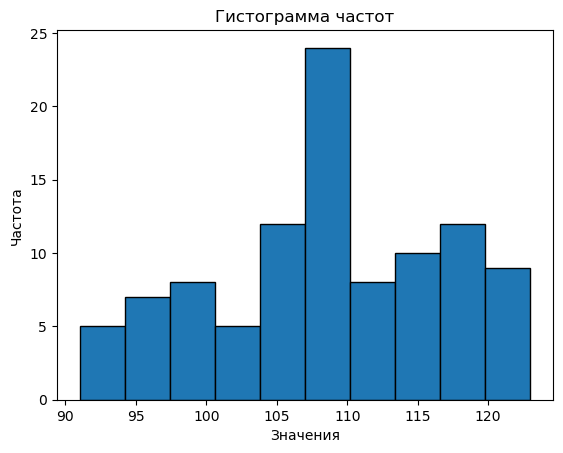

In [13]:
plt.hist(data_B, bins=10, edgecolor='black')
plt.title('Гистограмма частот')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

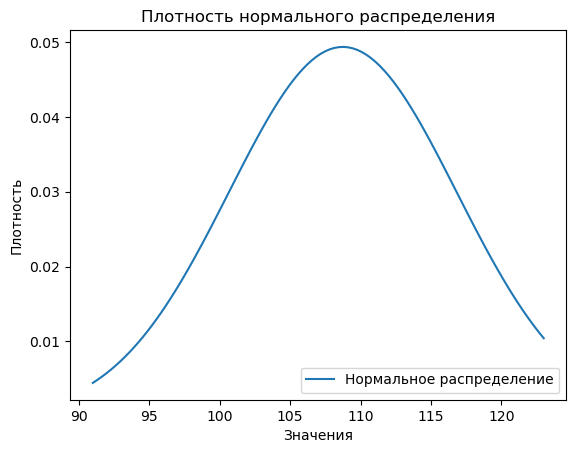

In [14]:
x = np.linspace(np.min(data_B), np.max(data_B), 100)
pdf = stats.norm.pdf(x, mean_B, std_B)
plt.plot(x, pdf, label='Нормальное распределение')
plt.title('Плотность нормального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()
plt.show()

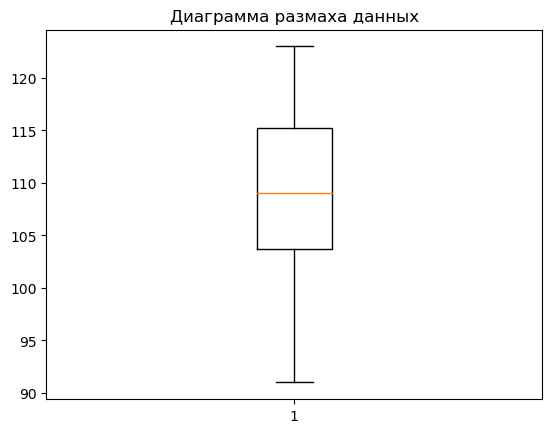

In [15]:
plt.boxplot(data_B)
plt.title('Диаграмма размаха данных')
plt.show()

In [16]:
hist, bins = np.histogram(data_B, bins=10)
expected = stats.norm.cdf(bins[1:], mean_B, std_B) - stats.norm.cdf(bins[:-1], mean_B, std_B)
expected *= len(data_B)
chi2, p = stats.chisquare(hist, expected)
print(f"χ2: {chi2:.2f}, p-value: {p:.4f}")
if p > 0.05:
    print("Гипотеза о нормальном распределении принимается")
else:
    print("Гипотеза о нормальном распределении отвергается")

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.05592163862351488

In [ ]:
#TASK B
data_V = np.array([
    110.75, 104.21, 104.25, 108.08, 108.57, 106.92, 108.57, 109.30, 113.52,
    113.72, 107.51, 104.94, 105.73, 111.77, 104.61, 106.13, 122.69, 112.79,
    112.27, 112.17, 109.13, 104.02, 111.14, 104.35, 104.15, 108.31, 108.93,
    108.24, 113.72, 113.19, 95.73, 113.78, 107.91, 105.17, 105.93, 112.79,
    100.91, 111.05, 113.22, 110.35, 112.33, 112.46, 109.56, 104.08, 107.48,
    107.09, 108.90, 109.63, 113.62, 107.91, 113.65, 98.36, 105.44, 105.14,
    104.78, 106.33, 118.27, 112.56, 110.25, 110.68, 113.03, 109.96, 94.05
])

In [ ]:
ks_stat, p_value = stats.ks_2samp(data_B, data_V)
print(f"KS статистика: {ks_stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Гипотеза о равенстве распределений принимается")
else:
    print("Гипотеза о равенстве распределений отвергается")

In [ ]:
plt.plot(np.sort(data_V), np.linspace(0, 1, len(data_V)), label='CDF')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

In [ ]:
hist, bins = np.histogram(data_V, bins=10)
centers = (bins[:-1] + bins[1:]) / 2
plt.plot(centers, hist, marker='o')
plt.title('Полигон частот')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()